In [3]:
!pip install opencv-python

In [11]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [5]:

# load the images
n_img = 50000
n_noisy = 40000
n_clean_noisy = n_img - n_noisy
imgs = np.empty((n_img,32,32,3))
for i in range(n_img):
    img_fn = f'C:/Users/nour/Downloads/train_data/images/{i+1:05d}.png'
    imgs[i,:,:,:]=cv2.cvtColor(cv2.imread(img_fn),cv2.COLOR_BGR2RGB)

# load the labels
clean_labels = np.genfromtxt('C:/Users/nour/Downloads/train_data/clean_labels.csv', delimiter=',', dtype="int8")
noisy_labels = np.genfromtxt('C:/Users/nour/Downloads/train_data/noisy_labels.csv', delimiter=',', dtype="int8")

In [9]:
# [DO NOT MODIFY THIS CELL]
# RGB histogram dataset construction
no_bins = 6
bins = np.linspace(0,255,no_bins) # the range of the rgb histogram
target_vec = np.empty(n_img)
feature_mtx = np.empty((n_img,3*(len(bins)-1)))
i = 0
for i in range(n_img):
    # The target vector consists of noisy labels
    target_vec[i] = noisy_labels[i]
    
    # Use the numbers of pixels in each bin for all three channels as the features
    feature1 = np.histogram(imgs[i][:,:,0],bins=bins)[0] 
    feature2 = np.histogram(imgs[i][:,:,1],bins=bins)[0]
    feature3 = np.histogram(imgs[i][:,:,2],bins=bins)[0]
    
    # Concatenate three features
    feature_mtx[i,] = np.concatenate((feature1, feature2, feature3), axis=None)
    i += 1

In [12]:
# [DO NOT MODIFY THIS CELL]
# Train a logistic regression model 
clf = LogisticRegression(random_state=0).fit(feature_mtx, target_vec)

In [15]:
# [DO NOT MODIFY THIS CELL]
def baseline_model(image):
    '''
    This is the baseline predictive model that takes in the image and returns a label prediction
    '''
    feature1 = np.histogram(image[:,:,0],bins=bins)[0]
    feature2 = np.histogram(image[:,:,1],bins=bins)[0]
    feature3 = np.histogram(image[:,:,2],bins=bins)[0]
    feature = np.concatenate((feature1, feature2, feature3), axis=None).reshape(1,-1)
    return clf.predict(feature)

In [21]:
results = []
for i in range(n_img):
    results.append(baseline_model(imgs[i, :,:,:]))

In [27]:
results == clean_labels

array([[ True, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False,  True,  True, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ...,  True,  True, False]])

In [29]:
#import sklearn.metrics.classification_report
print(classification_report(noisy_labels, results))

              precision    recall  f1-score   support

           0       0.17      0.23      0.19      4856
           1       0.13      0.21      0.16      5070
           2       0.12      0.03      0.05      4920
           3       0.12      0.07      0.09      5101
           4       0.14      0.28      0.19      5090
           5       0.14      0.07      0.10      5049
           6       0.15      0.20      0.17      5033
           7       0.18      0.02      0.04      4921
           8       0.15      0.25      0.19      5022
           9       0.13      0.07      0.09      4938

    accuracy                           0.14     50000
   macro avg       0.14      0.14      0.13     50000
weighted avg       0.14      0.14      0.13     50000



In [31]:
print(classification_report(clean_labels, results[0:10000]))

              precision    recall  f1-score   support

           0       0.32      0.43      0.37      1005
           1       0.18      0.29      0.22       974
           2       0.22      0.04      0.07      1032
           3       0.19      0.12      0.14      1016
           4       0.24      0.48      0.32       999
           5       0.22      0.13      0.16       937
           6       0.26      0.35      0.30      1030
           7       0.29      0.04      0.07      1001
           8       0.28      0.43      0.34      1025
           9       0.19      0.11      0.14       981

    accuracy                           0.24     10000
   macro avg       0.24      0.24      0.21     10000
weighted avg       0.24      0.24      0.21     10000



In [32]:
img_fn  #imgs[i,:,:,:]=cv2.cvtColor(cv2.imread(img_fn),cv2.COLOR_BGR2RGB)

'C:/Users/nour/Downloads/train_data/images/50000.png'

In [33]:
cv2.cvtColor(cv2.imread(img_fn),cv2.COLOR_BGR2RGB)

array([[[229, 229, 239],
        [236, 237, 247],
        [234, 236, 247],
        ...,
        [217, 219, 233],
        [221, 223, 234],
        [222, 223, 233]],

       [[222, 221, 229],
        [239, 239, 249],
        [233, 234, 246],
        ...,
        [223, 223, 236],
        [227, 228, 238],
        [210, 211, 220]],

       [[213, 206, 211],
        [234, 232, 239],
        [231, 233, 244],
        ...,
        [220, 220, 232],
        [220, 219, 232],
        [202, 203, 215]],

       ...,

       [[150, 143, 135],
        [140, 135, 127],
        [132, 127, 120],
        ...,
        [224, 222, 218],
        [230, 228, 225],
        [241, 241, 238]],

       [[137, 132, 126],
        [130, 127, 120],
        [125, 121, 115],
        ...,
        [181, 180, 178],
        [202, 201, 198],
        [212, 211, 207]],

       [[122, 119, 114],
        [118, 116, 110],
        [120, 116, 111],
        ...,
        [179, 177, 173],
        [164, 164, 162],
        [163, 163, 161]]

In [38]:
imgs[0,:1,:1,:]

array([[[59., 62., 63.]]])

In [40]:
!pip install torch

In [42]:
!pip install torchvision

In [43]:
import torch 
import torch.nn as nn
from torch.utils.data import Dataset,DataLoader
import torchvision
from torchvision import transforms
import torchvision.models as models
device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device("cpu")

In [46]:

import tqdm

import sys
import os
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
print(os.getcwd())


C:\Users\nour


running brian's code now

In [49]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split clean labels into training set and validation set

X_train_clean_noisy, X_test_clean_noisy, y_train, y_test = train_test_split(imgs[:n_clean_noisy], np.column_stack((clean_labels, noisy_labels[:10000])), test_size=0.25,random_state=5243)
y_train_clean = y_train[:,0]
y_train_noisy = y_train[:,1]
y_test_clean = y_test[:,0]
y_test_noisy = y_test[:,1]
if not os.path.exists("C:/Users/nour/data/test_labels.csv"):
    np.savetxt("C:/Users/nour/data/test_labels.csv", y_test_clean, delimiter=",")
if not os.path.exists("C:/Users/nour/data/test_images"):
    os.mkdir("C:/Users/nour/data/test_images")
    for i in range(X_test_clean_noisy.shape[0]):
        img_fn = f'C:/Users/nour/data/test_images/test{i+1:05d}.png'
        cv2.imwrite(img_fn,cv2.cvtColor(X_test_clean_noisy[i].astype('float32'), cv2.COLOR_RGB2BGR))
        
X_train_clean_noisy.shape
X_train = np.concatenate((X_train_clean_noisy,imgs[10000:]))
y_train_total_noisy = np.concatenate((y_train_noisy,noisy_labels[10000:]))
X_train.shape, y_train_total_noisy.shape

((47500, 32, 32, 3), (47500,))

In [51]:

def image_prepocessing(image,transform):
    return torch.unsqueeze(transform(image.astype(np.uint8)),0).float()

class LeNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)


    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch

        return x
    
class Model1Dataset(Dataset):
    def __init__(self,X_train,y_train,transform=None):
        self.X = X_train
        self.y = y_train
        self.transform = transform
    
    def __len__(self):
        return self.X.shape[0]
    
    def __getitem__(self,idx):
        x = self.X[idx]
        if self.transform:
            x = self.transform(x.astype(np.uint8))   
        else:
            x = np.transpose(x,(2,0,1))
        return x, self.y[idx]
    
# Image Augmentation
transform_model1 = transforms.Compose([
    transforms.ToPILImage(),
#     transforms.Resize((227,227)),
#     transforms.RandomHorizontalFlip(),
#     transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.4914, 0.4822, 0.4465],
        std=[0.2023, 0.1994, 0.2010],
    )
])

# model1_dataset = Model1Dataset(imgs,noisy_labels,transform=transform)
model1_dataset = Model1Dataset(X_train,y_train_total_noisy,transform=transform_model1) #I assume he meant transform_model1?
# model1_dataloader = DataLoader(model1_dataset, batch_size=128, shuffle=True)
model1_dataloader = DataLoader(model1_dataset, batch_size=128, shuffle=True)

###what does this do?
model1 = nn.Sequential(
    LeNet(),
    nn.Linear(16 * 5 * 5, 120),
    nn.ReLU(),
    nn.Linear(120, 84),
    nn.ReLU(),
    nn.Linear(84, 10)
)


In [87]:
lr = 0.001
epochs = 10

optimizer = torch.optim.Adam(model1.parameters(), lr=lr)
loss_fn = nn.CrossEntropyLoss()

def train_model1(dataloader,model,loss_fn, optimizer, epochs, filename):
    for i in range(epochs):
        train_loss, train_acc,n = 0, 0, 0
        for X,y in dataloader:
            X = X.to(device)
            y = y.to(device)
            y_hat = model(X.float())
            loss = loss_fn(y_hat,y.long())
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
            n += 1
        print(f"{i+1} epoches, train loss:{train_loss/n}")
    torch.save(model.state_dict(), filename)
train_model1(model1_dataloader,model1,loss_fn,optimizer,epochs)

In [56]:
model1.parameters()

<generator object Module.parameters at 0x000001E3728FC6D0>

In [59]:
new_model1 = model1
new_model1.load_state_dict(torch.load('project3_model1'))
new_model1.eval()

Sequential(
  (0): LeNet(
    (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  )
  (1): Linear(in_features=400, out_features=120, bias=True)
  (2): ReLU()
  (3): Linear(in_features=120, out_features=84, bias=True)
  (4): ReLU()
  (5): Linear(in_features=84, out_features=10, bias=True)
)

In [60]:
# [BUILD A MORE SOPHISTICATED PREDICTIVE MODEL]

# write your code here...
        
def model_I(image):
    '''
    This function should takes in the image of dimension 32*32*3 as input and returns a label prediction
    '''

    probs = new_model1(image_prepocessing(image,transform_model1))
    pred = np.argmax(probs.detach().numpy(),axis=1) 
    return pred[0]

In [61]:
model_I(imgs[1231])

9

In [123]:
imgs[1231].shape

(32, 32, 3)

# model 1 with corrected labels

In [117]:
class LeNetCorrected(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        
model1_correct = nn.Sequential(
    LeNetCorrected(),
    nn.Linear(16 * 5 * 5, 120),
    nn.ReLU(),
    nn.Linear(120, 84),
    nn.ReLU(),
    nn.Linear(84, 10)
)
train_model1(model2_dataloader,model1_correct,loss_fn,optimizer,epochs,'model1_corrected_labels')

RuntimeError: Expected 3D (unbatched) or 4D (batched) input to conv2d, but got input of size: [128, 512]

more sophisticated model!

In [62]:
# Using Pre-trained Alexnet as image encoder 
img_encoder = models.resnet18(pretrained=True) 
img_encoder.fc = nn.Identity()
img_encoder.to(device).eval()

C:\Users\nour\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\nour\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\nour/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [64]:
transform_model2 = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((227,227)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.4914, 0.4822, 0.4465],
        std=[0.2023, 0.1994, 0.2010],
    )
])

# with torch.no_grad():
#     encoded_imgs = np.empty((n_img,512))
#     for i in tqdm.tqdm(range(n_img)):
#         encoded_imgs[i] = img_encoder(image_prepocessing(imgs[i],transform_model2))
        
with torch.no_grad():
    encoded_imgs = np.empty((X_train.shape[0],512))
    for i in tqdm.tqdm(range(X_train.shape[0])):
        encoded_imgs[i] = img_encoder(image_prepocessing(X_train[i],transform_model2))
        
print(encoded_imgs.shape)

100%|████████████████████████████████████████████████████████████████████████████| 47500/47500 [48:28<00:00, 16.33it/s]

(47500, 512)


In [65]:
# np.savetxt('encoded_imgs.txt', encoded_imgs)
# encoded_imgs = np.loadtxt('encoded_imgs.txt')

np.savetxt('encoded_imgs_47500.txt', encoded_imgs)
encoded_imgs = np.loadtxt('encoded_imgs_47500.txt')

encoded_imgs.shape

class Model2LabelDataset(Dataset):
    def __init__(self,X_train_clean_noisy,y_train_noisy,y_train_clean):
        self.X = X_train_clean_noisy
        self.y_clean = y_train_clean
        self.y_noisy = y_train_noisy
    
    def __len__(self):
        return self.X.shape[0]
    
    def __getitem__(self,idx):
        return self.X[idx],self.y_noisy[idx],self.y_clean[idx]
    
# model2_label_dataset = Model2LabelDataset(encoded_imgs[:10000],noisy_labels[:10000],clean_labels)
# model2_label_dataloader = DataLoader(model2_label_dataset, batch_size=64, shuffle=True)

model2_label_dataset = Model2LabelDataset(encoded_imgs[:7500],y_train_noisy,y_train_clean)
model2_label_dataloader = DataLoader(model2_label_dataset, batch_size=64, shuffle=True)

class Model2LabelClean(nn.Module):
    def __init__(self,num_classes):
        super(Model2LabelClean,self).__init__()
        self.num_classes = num_classes
        self.fc1 = nn.Linear(512,100)
        self.fc2 = nn.Linear(self.num_classes,28)
        self.fc3 = nn.Linear(128,64)
        self.fc4 = nn.Linear(64,self.num_classes)
        
        self.bn1 = nn.BatchNorm1d(100)
        self.bn2 = nn.BatchNorm1d(28)
        self.bn3 = nn.BatchNorm1d(64)
        
    # x: Image
    # y: Label
    def forward(self,x,noisy_label):
        noisy_label = nn.functional.one_hot(noisy_label.long(), num_classes=self.num_classes)
        x = self.bn1(nn.functional.relu(self.fc1(x)))
        y_noisy = self.bn2(nn.functional.relu(self.fc2(noisy_label.float())))
        c = torch.cat((x,y_noisy),axis=1)
        c = self.bn3(nn.functional.relu(self.fc3(c)))
        c = torch.clip(self.fc4(c) + noisy_label,0,1)
        return c


In [66]:
model2_label_clean = Model2LabelClean(10)

lr = 0.001
epochs = 10

optimizer = torch.optim.Adam(model2_label_clean.parameters(), lr=lr)
loss_fn = nn.CrossEntropyLoss()

def train_model2_label(dataloader,model,loss_fn, optimizer, epochs):
    for i in range(epochs):
        train_loss, train_acc,n = 0, 0, 0
        for X,y_noisy,y_clean in dataloader:
            y_hat = model(X.float(),y_noisy)
            loss = loss_fn(y_hat,y_clean.long())
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
            n += 1
        print(f"{i} epoches, train loss:{train_loss/n}")
    torch.save(model.state_dict(), 'project3_model2_label_clean')
train_model2_label(model2_label_dataloader,model2_label_clean,loss_fn,optimizer,epochs)


0 epoches, train loss:1.8028108174518003
1 epoches, train loss:1.6828716740769856
2 epoches, train loss:1.644332543268042
3 epoches, train loss:1.6213750728106096
4 epoches, train loss:1.6137569112292791
5 epoches, train loss:1.5964474708346996
6 epoches, train loss:1.5907055604255806
7 epoches, train loss:1.5840460779303212
8 epoches, train loss:1.580139677403337
9 epoches, train loss:1.5744782181109411


In [67]:
new_model2_label_clean = model2_label_clean
new_model2_label_clean.load_state_dict(torch.load('project3_model2_label_clean'))
new_model2_label_clean.eval()

Model2LabelClean(
  (fc1): Linear(in_features=512, out_features=100, bias=True)
  (fc2): Linear(in_features=10, out_features=28, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
  (bn1): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

[2 0 9 7 3 0 0 4 0 3] [4 7 8 2 4 2 6 8 4 1]


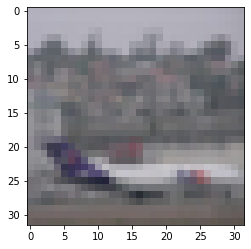

In [68]:
res = model2_label_clean(torch.tensor(encoded_imgs[30000:30010]).float(),torch.tensor(noisy_labels[30000:30010]))
print(np.argmax(res.detach().numpy(),axis=1) ,noisy_labels[30000:30010])
plt.imshow(imgs[30000]/255)

In [69]:
# predicted_clean_probs= model2_label_clean(torch.tensor(encoded_imgs[10000:]).float(),torch.tensor(noisy_labels[10000:]))
predicted_clean_probs= model2_label_clean(torch.tensor(encoded_imgs[7500:]).float(),torch.tensor(noisy_labels[10000:]))
predicted_clean_labels = np.argmax(predicted_clean_probs.detach().numpy(),axis=1) 
# model2_labels = np.concatenate((clean_labels, predicted_clean_labels),axis=0)
model2_labels = np.concatenate((y_train_clean, predicted_clean_labels),axis=0)
print(model2_labels.shape)

(47500,)


In [70]:
class Model2Dataset(Dataset):
    def __init__(self,X_train,y_train):
        self.X = X_train
        self.y = y_train
        
    def __len__(self):
        return self.X.shape[0]
    
    def __getitem__(self,idx):
        return self.X[idx], self.y[idx]
    
model2_dataset = Model2Dataset(encoded_imgs,model2_labels)
model2_dataloader = DataLoader(model2_dataset, batch_size=128, shuffle=True)

In [71]:
class Model2(nn.Module):
    def __init__(self,num_classes):
        super(Model2,self).__init__()
        self.num_classes = num_classes
        self.fc1 = nn.Linear(512,256)
        self.fc2 = nn.Linear(256,64)
        self.fc3 = nn.Linear(64,self.num_classes)
        
        self.bn1 = nn.BatchNorm1d(256)
        self.bn2 = nn.BatchNorm1d(64)
        
    # x: Image
    # y: Label
    
    def forward(self,x):
        x = self.bn1(nn.functional.relu(self.fc1(x)))
        x = self.bn2(nn.functional.relu(self.fc2(x)))
        x = self.fc3(x)
        return x

In [73]:
model2 = Model2(10)

lr = 0.001
epochs = 10

optimizer = torch.optim.Adam(model2.parameters(), lr=lr)
loss_fn = nn.CrossEntropyLoss()

def train_model2(dataloader,model,loss_fn, optimizer, epochs):
    for i in range(epochs):
        train_loss, train_acc,n = 0, 0, 0
        for X,y in dataloader:
            y_hat = model(X.float())
            loss = loss_fn(y_hat,y.long())
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
            n += 1
        print(f"{i+1} epoches, train loss:{train_loss/n}")
    torch.save(model.state_dict(), 'project3_model2')
train_model2(model2_dataloader,model2,loss_fn,optimizer,epochs)


1 epoches, train loss:0.7119387150291474
2 epoches, train loss:0.5475597585080773
3 epoches, train loss:0.5233229605420944
4 epoches, train loss:0.5059980606680275
5 epoches, train loss:0.4947857740585522
6 epoches, train loss:0.48200118101091793
7 epoches, train loss:0.47306936282304024
8 epoches, train loss:0.46545149450020123
9 epoches, train loss:0.4606695357029156
10 epoches, train loss:0.4482229122070856


In [74]:
new_model2_label_clean = model2_label_clean
new_model2_label_clean.load_state_dict(torch.load('project3_model2_label_clean'))
new_model2_label_clean.eval()

Model2LabelClean(
  (fc1): Linear(in_features=512, out_features=100, bias=True)
  (fc2): Linear(in_features=10, out_features=28, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
  (bn1): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [77]:
acc = 0
for i in range(len(clean_labels)):
    if clean_labels[i] == noisy_labels[i]:
        acc += 1
acc / len(clean_labels)

0.3968

In [ ]:
acc = [0 for i in range(10)]
for i in range(len(clean_labels)):
    if clean_labels[i] == noisy_labels[i]:
        acc += 1
acc / len(clean_labels)

In [78]:
min(clean_labels)

0

In [79]:
num_clean = [0] * 10
num_same = [0] * 10
for i in range(len(clean_labels)):
    num_clean[clean_labels[i]] += 1
    if clean_labels[i] == noisy_labels[i]:
        num_same[clean_labels[i]] += 1

In [83]:
for i in range(10):
    print(i, num_clean[i])

0 1005
1 974
2 1032
3 1016
4 999
5 937
6 1030
7 1001
8 1025
9 981


In [84]:
predicted_clean_labels

array([0, 6, 3, ..., 9, 0, 0], dtype=int64)

feature extraction!

In [101]:
    
# Image Augmentation
transform_model1_new = transforms.Compose([
    transforms.ToPILImage(),
#     transforms.Resize((227,227)),
#     transforms.RandomHorizontalFlip(),
#     transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.4914, 0.4822, 0.4465],
        std=[0.2023, 0.1994, 0.2010],
    )
])

# model1_dataset = Model1Dataset(imgs,noisy_labels,transform=transform)
#model1_dataset_new = Model1Dataset(X_train,y_train_total_noisy,transform=transform_model1) #I assume he meant transform_model1?
# model1_dataloader = DataLoader(model1_dataset, batch_size=128, shuffle=True)
#model1_dataloader_new = DataLoader(model1_dataset, batch_size=128, shuffle=True)

###what does this do?
lenet = LeNet()

#train_model1(model1_dataloader,model1,loss_fn,optimizer,epochs)

# Will contain the feature
features = []

# Iterate each image
for i in tqdm.tqdm(range(X_train.shape[0])):
    path = f'C:/Users/nour/Downloads/train_data/images/{i+1:05d}.png'
  # Read the file
    img_new = cv2.imread(path)
    img_new = transform_model1_new(img_new)
    # Reshape the image. PyTorch model reads 4-dimensional tensor
    # [batch_size, channels, width, height]
    #img_new = img_new.reshape(1, 6, 16, 5)
    img_new = img_new.to(device)
    # We only extract features, so we don't need gradient
    with torch.no_grad():
    # Extract the feature from the image
        feature = lenet(img_new)
    # Convert to NumPy Array, Reshape it, and save it to features variable
    features.append(feature.cpu().detach().numpy().reshape(-1))

# Convert to NumPy Array
features = np.array(features)

100%|███████████████████████████████████████████████████████████████████████████| 47500/47500 [07:43<00:00, 102.37it/s]


In [103]:
from sklearn.cluster import KMeans

# Initialize the model
k_model = KMeans(n_clusters=5, random_state=42)

# Fit the data into the model
k_model.fit(features)

# Extract the labels
k_labels = k_model.labels_

print(k_labels)

[1 3 0 ... 1 3 2]


In [109]:
len(y_train_clean), len(k_labels)

(7500, 47500)

In [110]:
lis = [[]] * 10
count = [0] * 10
for i in range(7500):
    count[y_train_clean[i]] += 1
    lis[y_train_clean[i]].append(k_labels[i])

In [114]:
for i in range(10):
    print(i, sum(lis[i])/len(lis[i]))

0 1.8153333333333332
1 1.8153333333333332
2 1.8153333333333332
3 1.8153333333333332
4 1.8153333333333332
5 1.8153333333333332
6 1.8153333333333332
7 1.8153333333333332
8 1.8153333333333332
9 1.8153333333333332


In [115]:
model2_dataset

In [122]:
import sys
sys.getsizeof(model2)

48